In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
running_df = pd.read_csv("/content/2021-10-08 08_09_08-participant.csv", error_bad_lines=False, delimiter=';')

In [ ]:
def report(df):
  col = []
  d_type = []
  uniques = []
  n_uniques = []

  for i in df.columns:
    col.append(i)
    d_type.append(df[i].dtypes)
    uniques.append(df[i].unique()[:5])
    n_uniques.append(df[i].nunique())

  return pd.DataFrame({'Column': col, 'd_type':d_type, 'unique_sample':uniques, 'n_unique_sample':n_uniques})

In [ ]:
report(running_df)

,Column,d_type,unique_sample,n_unique_sample
0,ID,int64,"[226, 229, 230, 233, 237]",941
1,UID,object,"[AprMOIXpVg, POiheOXR9Y, xWsRJXGMO4, 8cFsvP1EL...",941
2,BID,object,"[ClZHmk5C2u, ikEnv5YsUP, etd87vjFPE, 51rRttkd5...",897
3,Nama,object,"[Intan widjaja, LATIFA MULKI ARFINDILA, Endi H...",940
4,Email,object,"[intanwidjaja@yahoo.com, latifamulkia@gmail.co...",926
5,Alamat,object,[Dewat maka no.8 Kompleks singgasana Pradana B...,909
6,Kode Pos,object,"[40238, 69317, 45142, 40268, 17520]",617
7,Jasa Ekspedisi,object,"[jne, nan, pos, Lion Parcel]",3
8,Jenis Ekspedisi,object,"[CTC, OKE, REG, YES, nan]",11
9,Ongkos Kirim,float64,"[11000.0, 23000.0, 15000.0, 13000.0, 19000.0]",72


In [ ]:
running_df = running_df.drop(columns=['ID', 'UID', 'BID', 'Created At', 'Total Distance (KM)', 'Total Duration (S)', 'Finish', 'Finish Timestamp'])

In [ ]:
running_df.Kota = running_df.Kota.str.title()
running_df.Provinsi = running_df.Provinsi.str.title()
running_df.Komunitas = running_df.Komunitas.str.title()
running_df.replace(1, "Full Package", inplace=True)
running_df.replace(2, "Medal Package", inplace=True)
running_df.replace(3, "Citivas Tel-U Package", inplace=True)
running_df.replace(4, "Community Package", inplace=True)

In [ ]:
report(running_df)

,Column,d_type,unique_sample,n_unique_sample
0,Nama,object,"[Intan widjaja, LATIFA MULKI ARFINDILA, Endi H...",940
1,Email,object,"[intanwidjaja@yahoo.com, latifamulkia@gmail.co...",926
2,Alamat,object,[Dewat maka no.8 Kompleks singgasana Pradana B...,909
3,Kode Pos,object,"[40238, 69317, 45142, 40268, 17520]",617
4,Jasa Ekspedisi,object,"[jne, nan, pos, Lion Parcel]",3
5,Jenis Ekspedisi,object,"[CTC, OKE, REG, YES, nan]",11
6,Ongkos Kirim,float64,"[11000.0, 23000.0, 15000.0, 13000.0, 19000.0]",72
7,No Telepon,object,"[081573206197, 081319513801, 08161873266, 0877...",935
8,Gender,object,"[female, male]",2
9,Tgl Lahir,object,"[1970-11-08, 2002-02-01, 1976-05-03, 1974-08-0...",899


In [ ]:
provinsi = running_df["Provinsi"].value_counts().to_frame().reset_index().rename(columns={'index':'Provinsi', 'Provinsi': 'Jumlah'}).sort_values(by='Provinsi', ascending=True).reset_index(drop=True)
provinsi

,Provinsi,Jumlah
0,Bali,6
1,Bangka Belitung,2
2,Banten,72
3,Bengkulu,2
4,Di Yogyakarta,17
5,Dki Jakarta,128
6,Gorontalo,1
7,Jambi,4
8,Jawa Barat,353
9,Jawa Tengah,83


In [ ]:
provinsi.Provinsi.replace('Nanggroe Aceh Darussalam (Nad)', 'Nanggroe Aceh Darussalam (NAD)', inplace=True)
provinsi.Provinsi.replace('Nusa Tenggara Barat (Ntb)', 'Nusa Tenggara Barat (NTB)', inplace=True)
provinsi.Provinsi.replace('Nusa Tenggara Timur (Ntt)', 'Nusa Tenggara Timur (NTT)', inplace=True)
provinsi

,Provinsi,Jumlah
0,Bali,6
1,Bangka Belitung,2
2,Banten,72
3,Bengkulu,2
4,Di Yogyakarta,17
5,Dki Jakarta,128
6,Gorontalo,1
7,Jambi,4
8,Jawa Barat,353
9,Jawa Tengah,83


In [ ]:
provinsi.to_excel('provinsi.xlsx', index=False)

In [2]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 6.3 MB 27.1 MB/s 


In [3]:
import urllib.request
import json
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from plotly import graph_objects as go
import geopandas as gpd

In [4]:
map_df = gpd.read_file("/content/drive/MyDrive/Visualisasi Tel U VR 2021/idn_adm_bps_20200401_shp")
map_df

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,27.367364,4.625437,Aceh,ID11,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((97.39178 2.03748, 97.39055 2.0..."
1,6.026648,0.458717,Bali,ID51,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((115.12509 -8.84761, 115.12499 ..."
2,9.279900,0.764911,Banten,ID36,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ..."
3,11.653771,1.630129,Bengkulu,ID17,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((102.38616 -5.47144, 102.38626 ..."
4,3.341561,0.260130,Daerah Istimewa Yogyakarta,ID34,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((110.81980 -8.20358, 110.81951 ..."
5,3.123689,0.053426,Dki Jakarta,ID31,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((106.87677 -6.10030, 106.87596 ..."
6,11.013243,0.977600,Gorontalo,ID75,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((121.42536 0.41243, 121.42355 0..."
7,11.835073,3.977711,Jambi,ID15,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((104.40714 -0.86371, 104.40590 ..."
8,11.605868,3.032785,Jawa Barat,ID32,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((108.68501 -6.76990, 108.68411 ..."
9,15.452527,2.819838,Jawa Tengah,ID33,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((108.88353 -7.74846, 108.88322 ..."


In [5]:
df_provinsi = pd.read_csv("/content/drive/MyDrive/Visualisasi Tel U VR 2021/provinsi fix.csv", delimiter=';')
df_provinsi

,Provinsi,Jumlah
0,Bali,6
1,Kepulauan Bangka Belitung,2
2,Banten,72
3,Bengkulu,2
4,Daerah Istimewa Yogyakarta,17
5,Dki Jakarta,128
6,Gorontalo,1
7,Jambi,4
8,Jawa Barat,353
9,Jawa Tengah,83


In [6]:
df_provinsi.sort_values(by='Provinsi', ascending=True, inplace=True)

In [7]:
df_provinsi.reset_index(drop=True, inplace=True)

In [8]:
df_provinsi

,Provinsi,Jumlah
0,Aceh,6
1,Bali,6
2,Banten,72
3,Bengkulu,2
4,Daerah Istimewa Yogyakarta,17
5,Dki Jakarta,128
6,Gorontalo,1
7,Jambi,4
8,Jawa Barat,353
9,Jawa Tengah,83


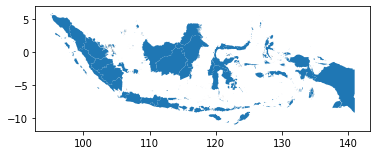

In [9]:
map_df.plot()

In [10]:
map_df.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,27.367364,4.625437,Aceh,ID11,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((97.39178 2.03748, 97.39055 2.0..."
1,6.026648,0.458717,Bali,ID51,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((115.12509 -8.84761, 115.12499 ..."
2,9.279900,0.764911,Banten,ID36,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ..."
3,11.653771,1.630129,Bengkulu,ID17,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((102.38616 -5.47144, 102.38626 ..."
4,3.341561,0.260130,Daerah Istimewa Yogyakarta,ID34,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((110.81980 -8.20358, 110.81951 ..."


In [12]:
merged = map_df.set_index('ADM1_EN').join(df_provinsi.set_index('Provinsi'))
merged

,Shape_Leng,Shape_Area,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Jumlah
ADM1_EN,,,,,,,,,,,,,
Aceh,27.367364,4.625437,ID11,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((97.39178 2.03748, 97.39055 2.0...",6
Bali,6.026648,0.458717,ID51,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((115.12509 -8.84761, 115.12499 ...",6
Banten,9.279900,0.764911,ID36,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ...",72
Bengkulu,11.653771,1.630129,ID17,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((102.38616 -5.47144, 102.38626 ...",2
Daerah Istimewa Yogyakarta,3.341561,0.260130,ID34,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((110.81980 -8.20358, 110.81951 ...",17
Dki Jakarta,3.123689,0.053426,ID31,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((106.87677 -6.10030, 106.87596 ...",128
Gorontalo,11.013243,0.977600,ID75,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((121.42536 0.41243, 121.42355 0...",1
Jambi,11.835073,3.977711,ID15,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((104.40714 -0.86371, 104.40590 ...",4
Jawa Barat,11.605868,3.032785,ID32,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((108.68501 -6.76990, 108.68411 ...",353


In [13]:
jumlah = 'Jumlah'
vmin_jumlah = merged['Jumlah'].min()
vmax_jumlah = merged['Jumlah'].max()

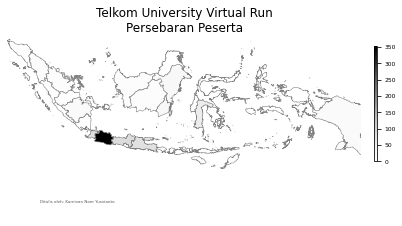

In [18]:
fig5 = plt.figure()
ax = fig5.add_axes([0, 0, 1, 1])
ax.axis('off')
fig5.set_facecolor("#ffffff")
fig5.patch.set_facecolor("#ffffff")
ax.axis('off')
ax.margins(0)
ax.apply_aspect()

bbox = ax.get_window_extent().inverse_transformed(fig5.transFigure)
w,h = fig5.get_size_inches()
fig5.set_size_inches(w*bbox.width, h*bbox.height)
merged.plot(column=jumlah, cmap='Greys', linewidth=0.5, ax=ax, edgecolor='0.5')
cbar = fig5.colorbar(plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=vmin_jumlah, vmax=vmax_jumlah)), orientation="vertical", aspect=40, shrink=0.4, pad=0.03)
cbar.ax.tick_params(labelsize=6)

ax.set_title('Telkom University Virtual Run\nPersebaran Peserta', \
              fontdict={'fontsize': '12',
                        'fontweight' : '3'})
ax.annotate('Ditulis oleh: Kurnivan Noer Yusvianto',
           xy=(0.1, .1), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='bottom',
           fontsize=4, color='#555555');

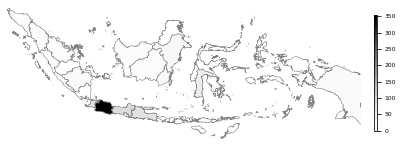

In [19]:
fig5 = plt.figure()
ax = fig5.add_axes([0, 0, 1, 1])
ax.axis('off')
fig5.set_facecolor("#ffffff")
fig5.patch.set_facecolor("#ffffff")
ax.axis('off')
ax.margins(0)
ax.apply_aspect()

bbox = ax.get_window_extent().inverse_transformed(fig5.transFigure)
w,h = fig5.get_size_inches()
fig5.set_size_inches(w*bbox.width, h*bbox.height)
merged.plot(column=jumlah, cmap='Greys', linewidth=0.5, ax=ax, edgecolor='0.5')
cbar = fig5.colorbar(plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=vmin_jumlah, vmax=vmax_jumlah)), orientation="vertical", aspect=40, shrink=0.4, pad=0.03)
cbar.ax.tick_params(labelsize=6)

In [20]:
fig5.savefig('Tel U VR3.png', dpi=480)